# Исследование окупаемости вложений в рекламу развлекательного приложения

В рекламу развлекательного приложения были вложены огромные средства. Однако, в последние несколько месяцев компания терпит убытки. Необходимо выявить основные причины, оказывающие наибольшее влияние на текущее положение дел, и помочь компании выйти в плюс.

Необходимо будет изучить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

### Описание данных:

В распоряжении имеются три датасета:
- **`visits_info_short.csv`** содержит информацию о посещениях;
- **`orders_info_short.csv`** содержит информацию о заказах;
- **`costs_info_short.csv`** содержит информацию о расходах на рекламу.

Структура **`visits_info_short.csv`**:
- `User Id` - уникальный идентификатор пользователя;
- `Region` - страна пользователя;
- `Device` - тип устройства пользователя;
- `Channel` - идентификатор источника перехода;
- `Session Start` - дата и время начала сессии;
- `Session End` - дата и время окончания сессии.

Структура **`orders_info_short.csv`**:
- `User Id` - уникальный идентификатор пользователя;
- `Event Dt` - дата и время покупки;
- `Revenue` - сумма заказа.

Структура **`costs_info_short.csv`**:
- `dt` - уникальный идентификатор пользователя;
- `Channel` - идентификатор рекламного источника;
- `Costs` - расходы на кампанию.

### 1. Открытие файла и изучение общей информации

---

#### 1.1 Импорт необходимых библиотек

Для начала импортируем все необходимые библиотеки для работы с данными и построением графиков.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime, timedelta

#### 1.2 Изучение общей информации о датафрейме

Считаем данные из файлов и запишем их в переменные `visits`, `orders` и `costs`.

Пути к файлам:

- `/datasets/visits_info_short.csv`
- `/datasets/orders_info_short.csv`
- `/datasets/costs_info_short.csv`

In [2]:
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

Выведем первые 5 строк для каждого датасета.

In [3]:
pd.set_option('display.max_columns', None)

display(visits.head(5))
display(orders.head(5))
costs.head(5)

User Id         Region   Device  Channel        Session Start   
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01  \
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Выведем основную информацию о каждом датафрейме при помощи метода `info()`.

In [4]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Заметим, что в приведенных датафреймах полностью отсутствуют пропуски. Некоторые столбцы с датами (`Session Start`, `Session End` из **`visits`**, `Event Dt` из **`orders`**, `dt` из **`costs`**) имеют тип **object**. Также для более удобной работы с датафреймами в дальнейшем приведем все названия столбцов к нижнему регистру.

**Вывод:**

Первоначально изучив общую информацию об исходных датафреймах, далее можно переходить к их предобработке.

### 2. Предобработка данных

---

#### 2.1 Преобразование названий столбцов

Приведем названия всех столбцов к нижнему регистру для удобства работы с датафреймом в дальнейшем и уберем пропуски, если они присутствуют.

In [5]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

visits = visits.rename(columns={'user id' : 'user_id',
                                'session start' : 'session_start',
                                'session end' : 'session_end'})
orders = orders.rename(columns={'user id' : 'user_id',
                                'event dt' : 'event_dt'})

Проверим, что названия всех столбцов написаны в одном, удобном стиле.

In [6]:
display(visits.columns)
display(orders.columns)
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Далее можно приступить к дальнейшей предобработке датафрейма.

#### 2.2 Изменение типов данных

Преобразуем некоторые столбцы в нужные типы. Как было выяснено ранее, некоторые стоблцы с датами (`session_start`, `session_end` из **`visits`**, `event_dt` из **`orders`**) имеют тип **object**. Преобразуем их в тип **datetime64**.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим, что типы данных поменялись.

In [8]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Заметим, что типы данных для выбранных столбцов поменялись на необходимые.

#### 2.3 Обработка дубликатов

##### 2.3.1 Проверка на наличие явных дубликатов

Проверим исходные датафреймы на наличие явных строк-дубликатов.

In [9]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

Нетрудно заметить, что явных дубликатов в исходных выборках нет.

##### 2.3.1 Проверка на наличие явных дубликатов

Также проверим датафреймы на наличие явных дубликатов. Рассмотрим уникальные значения столбцов с типом **object**.

Начнем с датафрейма `visits`.

In [10]:
display(visits['region'].sort_values().unique())
display(visits['device'].sort_values().unique())
visits['channel'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

Заметим, что значения в данных столбцах не повторяются.

Поскольку в датафрейме `orders` нет столбцов типа **object**, перейдем к датасету `costs`.

In [11]:
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

В данном столбце тоже нет повторяющихся значений.

Проверка на неявные дубликаты показала, что в исходных датасетах их нет.

**Вывод:**

Преобразовав названия столбцов, изменив, где необходимо, тип данных, проверив датасеты на явные и неявные дубликаты, далее можно перейти к расчету необходимых метрик и исследовательскому анализу данных.

### 3. Определение функций для расчета и визуализации изучаемых метрик

---

#### 3.1 Функции для расчета основных метрик

Напишем необходимые функции для расчета метрик LTV, ROI, удержания и конверсии.

Для создания профилей пользователей создадим функцию `get_profiles`.

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.date

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Также понадобится функция `get_retention()` для подсчета Retention Rate.

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Для подсчета конверсии создадим `get_conversion()`.

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Расчет LTV будем производить при помощи функции `get_ltv()`.

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### 3.2 Функции для визуализации основных метрик

Также обозначим функции для построения графиков.

Зададим функию `filter_data()` для сглаживания данных.

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Для построения Retention Rate создадим функцию `plot_retention()`.

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Для построения графика конверсии воспользуемся `plot_conversion()`.

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция `plot_ltv_roi()` позволит визуализировать LTV и ROI.

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод:**

Задав функции для расчета основных метрик и их визуализации, далее можно приступать к исcледовательскому анализу данных для изучения основных закономерностей.

### 4. Исследовательский анализ данных

---

#### 4.1 Создание профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

Получим профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и тратах на рекламу развлекательного приложения.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region   
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States  \
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt       month  payer  acquisition_cost  
0  2019-05-07  2019-05-07   True          1.088172  
1  2019-07-09  2019-07-09  False          1.107237  
2  2019-10-01  2019-10-01  False          0.000000  
3  2019-08-22  2019-08-22  False          0.988235  
4  2019-10-02  2019-10-02  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Заметим, что в наличии имеются данные с начала мая по конец октября.

#### 4.2 Исследование количества привлеченных пользователей по различным странам

Рассмотрим, из каких стран было привлечено наибольшее количество пользователей. Также посчитаем долю платящих для каждой страны.

Создадим функцию `user_count()`, которая позволит оптимизировать получение сводной таблицы только лишь при задании одного параметра, по которому будет происходить группировка данных.

In [22]:
def user_count(column):
    return profiles.groupby(column).agg({'user_id' : 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)

In [23]:
user_count('region')

user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994

Наибольшее количество пользователей было привлечено из региона **United States**. Для этого же региона характерен наибольший процент платящих пользователей. Остальные регионы показывают приблизительно одинаковые показатели по количеству привлеченных пользователей и доли платящих, однако выделяется **Germany** с чуть большим процентом платящих пользователей при меньшем их количестве.

#### 4.3 Исследование количества привлеченных пользователей по используемым устройствам

Рассмотрим, какими устройствами пользовались клиенты приложения и какие устройства предпочитают платящие пользователи. Дополнительно посчитаем долю платящих для каждого устройства.

In [24]:
user_count('device')

user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468

Заметим, что большинство клиентов заходят в приложение с устройства **iPhone**, для остальных же девайсов показатели по посещаемости находятся приблизительно на одном уровне. Наибольшая доля платящих пользователей приходится на устройства **Mac** и **iPhone**, причем у первого девайса наблюдается наименьшее количество посещений по сравнению с другими гаджетами. Самый низкий показатель по проценту платящих пользователей среди рассматриваемых устройств имеет **PC**.

#### 4.4 Исследование количества привлеченных пользователей по различным рекламным источникам

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
user_count('channel')

user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553

Лучшие показатели по количеству привлеченных пользователей и доле платящих показывает **FaceBoom**. По совокупности показателей также выделяется источник **TipTop**, а по доле платящих – **AdNonSense** и **lambdaMediaAds**. Плохие же показатели наблюдаются у **OppleCreativeMedia**, **LeapBob** и **MediaTornado**. Также заметим, что наибольшее количество пользователей пришло без рекламы (**organic**), разница со вторым по численности каналом привлечения составляет в 2 раза.

**Вывод:**

Наилучшие показатели по привлечению клиентов и доле платящих пользователей показывают:

- Регион – **United States** по совокупности показателей, **Germany** по доле платящих пользователей.
- Устройство – **iPhone** по совокупности показателей, **Mac** по доле платящих пользователей.
- Рекламный источник – **FaceBoom** и **TipTop** по совокупности показателей.

### 5. Маркетинг

---

#### 5.1 Расчет общий суммы расходов на маркетинг

Рассчитаем общую сумму расходов на маркетинг. Для этого воспользуемся столбцом `costs` датафрейма **`costs`**.

In [26]:
adv_costs_sum = costs['costs'].sum()

print(f'Сумма расходов на маркетинг: {int(adv_costs_sum)}')

Сумма расходов на маркетинг: 105497


#### 5.2 Распределение трат по рекламным источникам 

Выясним, как траты распределены по рекламным источникам, т.е. сколько денег потратили на каждый рекламный канал. Также посчитаем долю каждого рекламного источника от общих трат на маркетинг.

In [27]:
table_channel = costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False)
table_channel['percentage'] = (table_channel['costs'] / adv_costs_sum) * 100

table_channel

costs  percentage
channel                                 
TipTop              54751.30   51.898295
FaceBoom            32445.60   30.754910
WahooNetBanner       5151.00    4.882589
AdNonSense           3911.25    3.707441
OppleCreativeMedia   2151.25    2.039152
RocketSuperAds       1833.00    1.737485
LeapBob              1797.60    1.703930
lambdaMediaAds       1557.60    1.476436
MediaTornado          954.48    0.904744
YRabbit               944.22    0.895018

Заметим, что наибольшее количество средств было потрачено на рекламные источники **TipTop** и **FaceBoom**, траты на другие рекламные каналы отличаются на порядок.

#### 5.3 Динамика изменения расходов на рекламные источники

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому рекламному источнику. Для начала получим значения недели и месяца из столбца `dt`.

In [28]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

Создадим сводную таблицу, в которой сгруппируем затраты на рекламу для каждого источника по неделям, и построим интересующий график.

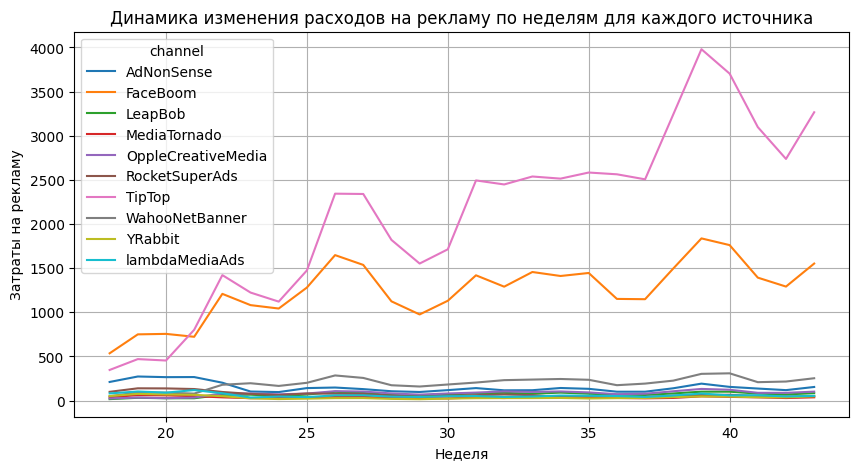

In [29]:
week_history = costs.pivot_table(index='week',
                                 columns='channel', 
                                 values='costs', 
                                 aggfunc='sum')

week_history.plot(grid=True, figsize=(10, 5))
plt.title('Динамика изменения расходов на рекламу по неделям для каждого источника')
plt.xlabel('Неделя')
plt.ylabel('Затраты на рекламу');

Заметим, что наибольшие затраты на рекламную кампанию имеют источники **TipTop** и **FaceBoom**. Также можно отметить резкое увеличение показателя затрат с 26-й по 27-ю и на 39-ю недели. Это может быть связано с началом сезона активных продаж или стартом промоакций в приложении.

Проделаем то же самое, но сгруппируем теперь по месяцам.

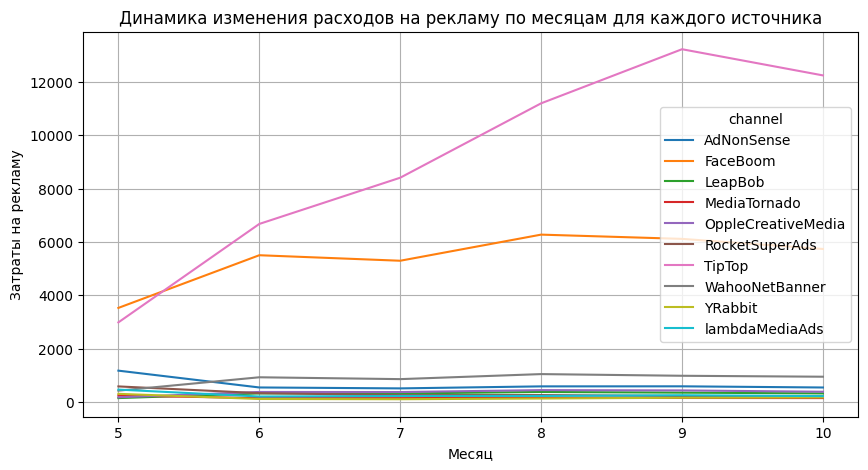

In [30]:
month_history = costs.pivot_table(index='month', 
                                  columns='channel', 
                                  values='costs', 
                                  aggfunc='sum')

month_history.plot(grid=True, figsize=(10, 5))
plt.title('Динамика изменения расходов на рекламу по месяцам для каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу');

На приведенном графике можно заметить ту же тенденцию: наибольшие значения по затратам имеют рекламные источники **TipTop** и **FaceBoom**.

Дополнительно рассмотрим динамику расходов для других рекламных источников кроме двух наиболее затратных (**TipTop** и **FaceBoom**)

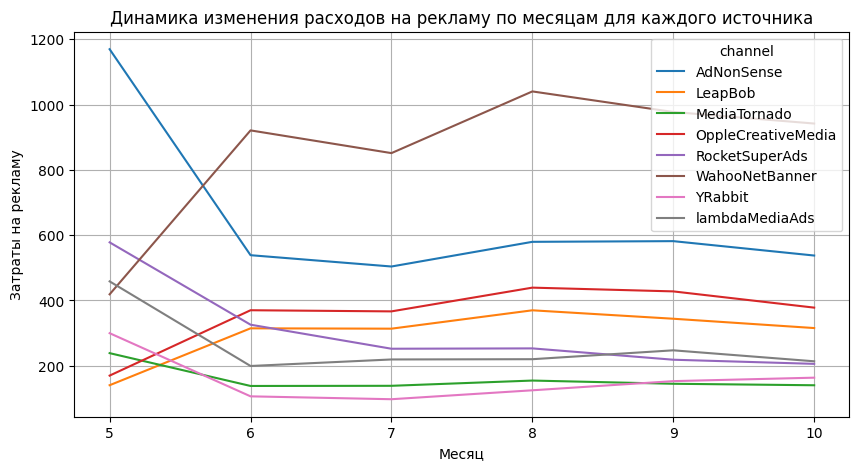

In [31]:
month_history_filtered = costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(index='month', 
                                                                                                  columns='channel', 
                                                                                                  values='costs', 
                                                                                                  aggfunc='sum')

month_history_filtered.plot(grid=True, figsize=(10, 5))
plt.title('Динамика изменения расходов на рекламу по месяцам для каждого источника')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу');

Видно, что затраты на рекламные источники **AdNonSense**, **RocketSuperAds**, **lambdaMediaAds** были снижены с течением времени, причем финансирование для первого было сокращено в 2 раза. Для рекламного канала **WahooNetBanner** наоброт же наблюдается положительная динамика в затратах.

#### 5.4 Оценка стоимости привлечения пользователей для каждого источника

Рассчитаем среднюю стоимость привлечения одного пользователя (`CAC`) для каждого рекламного источника. Построим график динамики `CAC` по каналам привлечения и посчитаем среднее значение для каждого. Для этого будем использовать профили пользователей.

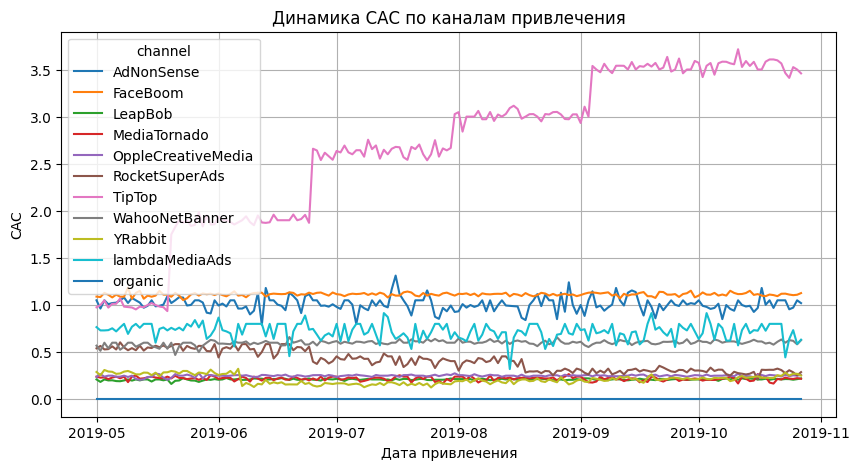

In [32]:
channel_cac = profiles.pivot_table(index='dt', 
                                   columns='channel', 
                                   values='acquisition_cost', 
                                   aggfunc='mean')

channel_cac.plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [33]:
cac_channel = profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).sort_values(by='acquisition_cost', ascending=False)

cac_channel

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Наибольшие значения средней стоимости привлечения одного пользователя имеют источники **TipTop**, **FaceBoom** и **AdNonSense**, причем отношение по затратам между первым и вторым источником в таблице составляет 2,5 раза.

Дополнительно посчитаем средний `CAC` по всем рекламным источникам.

In [34]:
print(f'Средний уровень САС по всем рекламным источникам составляет: {cac_channel.acquisition_cost.mean()}')

Средний уровень САС по всем рекламным источникам составляет: 0.6870317251013996


Только 4 рекламных источника превышают средний уровень `CAC`: **TipTop**, **FaceBoom**, **AdNonSense** и **lambdaMediaAds**.

**Вывод:**

При анализе расходов на маркетинг было выявлено следующее:

- Наибольшее количество средств было потрачено на рекламные источники **TipTop** и **FaceBoom**, траты на другие рекламные источники отличаются на порядок.
- Наибольшие значения средней стоимости привлечения одного пользователя имеют источники **TipTop**, **FaceBoom** и **AdNonSense**.

### 6. Оценка окупаемости рекламы

---

#### 6.1 Анализ окупаемости рекламы по графикам LTV, CAC и ROI

Проанализируем окупаемость рекламы. Построим графики для `LTV`, `ROI` и `CAC`. В качестве момента анализа выберем дату **1 ноября 2019 года**, а горизонт анализа возьмем в количестве **14 дней**. Воспользуемся функцией `get_ltv()`.

Однако, перед расчетом метрик уберем из всех датафреймов строки, в которых столбец `channel` принимает значение **organic**.

In [35]:
visits = visits.query('channel != "organic"')
costs = costs.query('channel != "organic"')
profiles = profiles.query('channel != "organic"')

In [36]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

Построим графики при помощи функции `plot_ltv_roi()`.

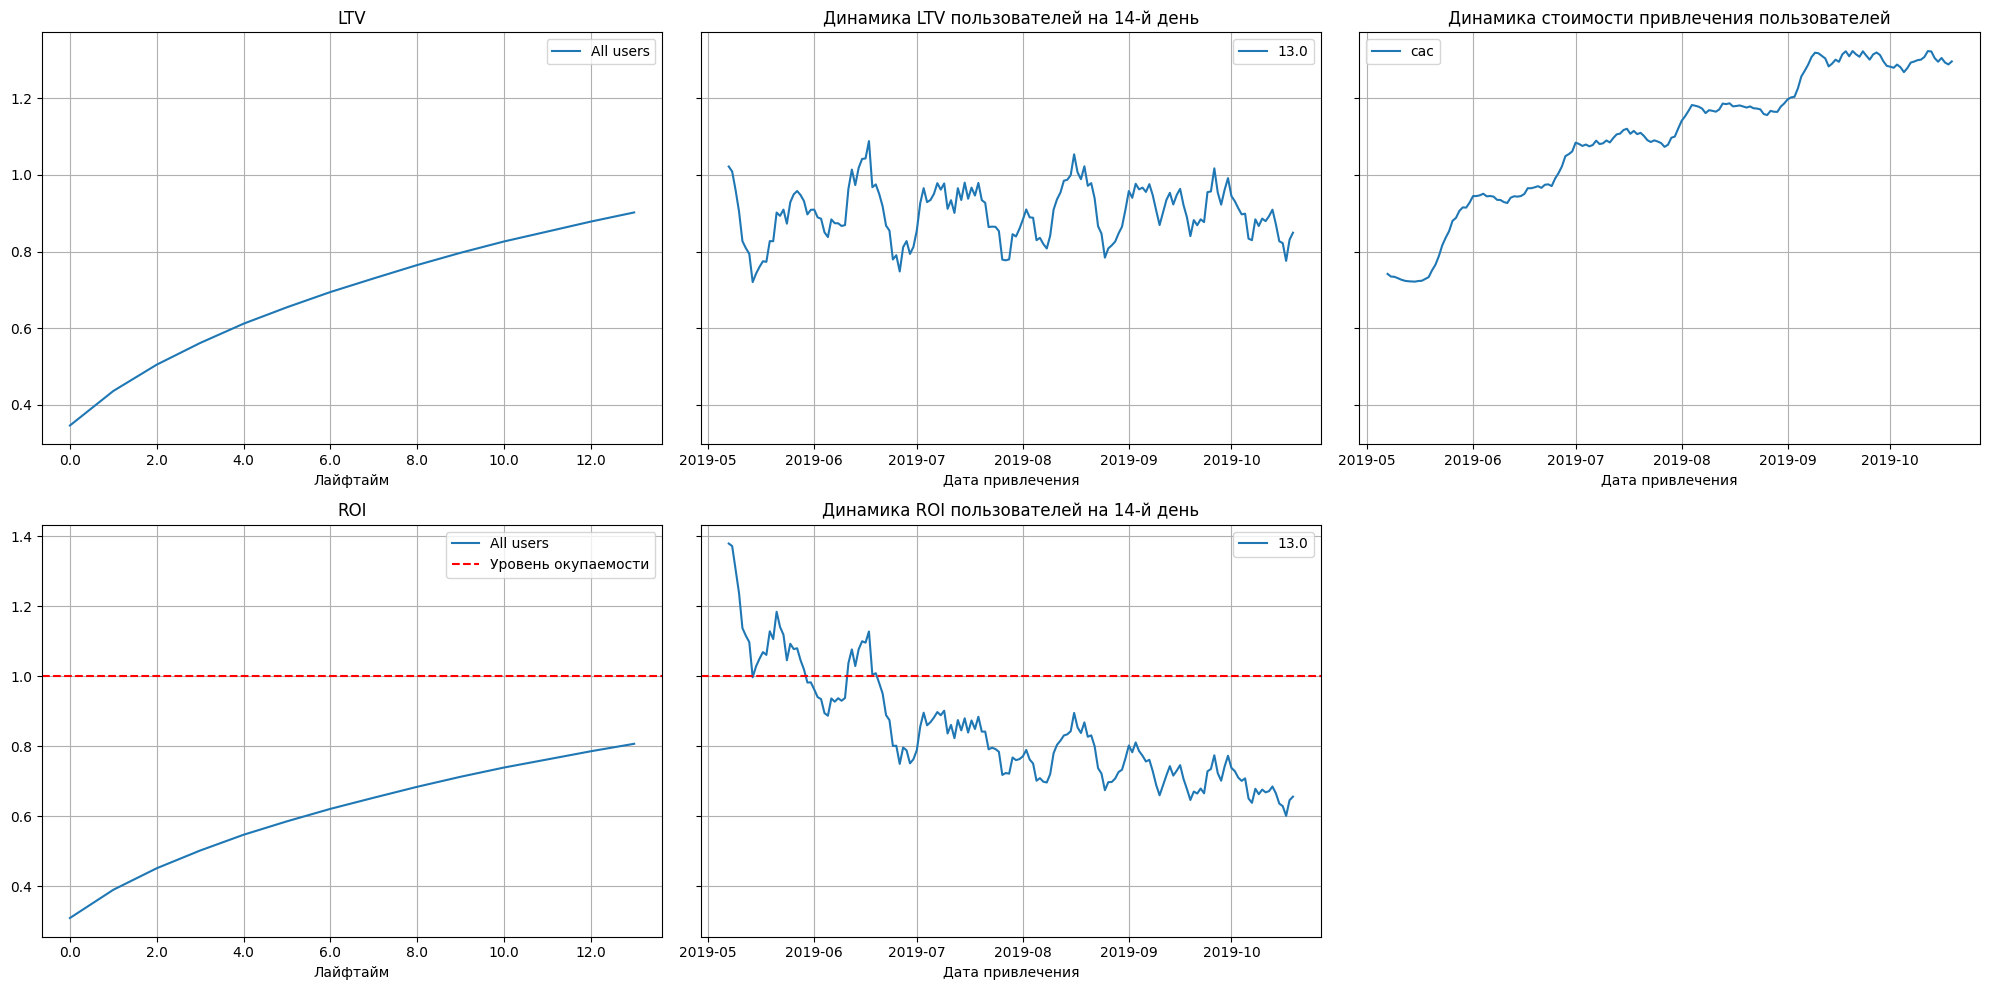

In [37]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Реклама не окупается. `ROI` имел положительные значения в самом начале на небольшом промежутке, однако в динамике наблюдается тенденция к его уменьшению.
- `CAC` с течением времени увеличивался, резкий скачок увеличения затрат наблюдался в июне.
- На `LTV` может влиять сезонный фактор, но в целом этот показатель достаточно стабилен.

#### 6.2 Анализ конверсии и удержания пользователей, динамика их изменения

##### 6.2.1 Общий анализ

Проанализируем такие показатели как конверсия и удержание пользователей. Для их расчета воспользуемся функциями `get_retention()` и `get_conversion()`. Также рассмотрим динамику их изменения и построим графические зависимости при помощи `plot_retention()` и `plot_conversion()`.

Для начала рассмотрим конверсию.

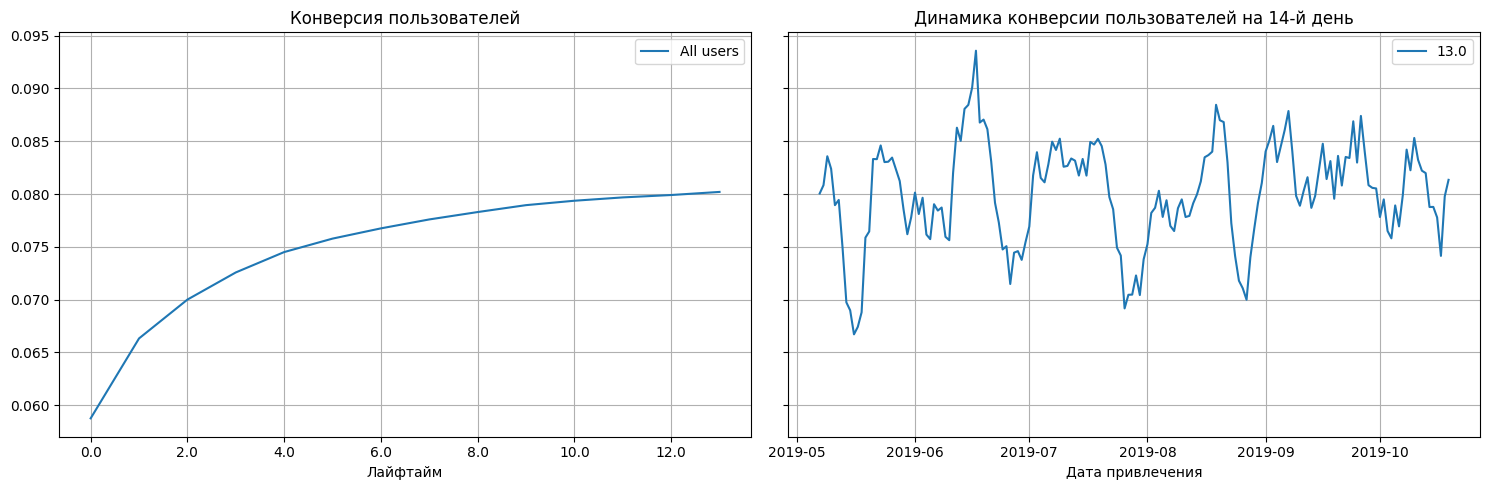

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Заметим, что в самом начале наблюдается сильный провал в конверсии.

Теперь проведем аналогичные операции для удержания.

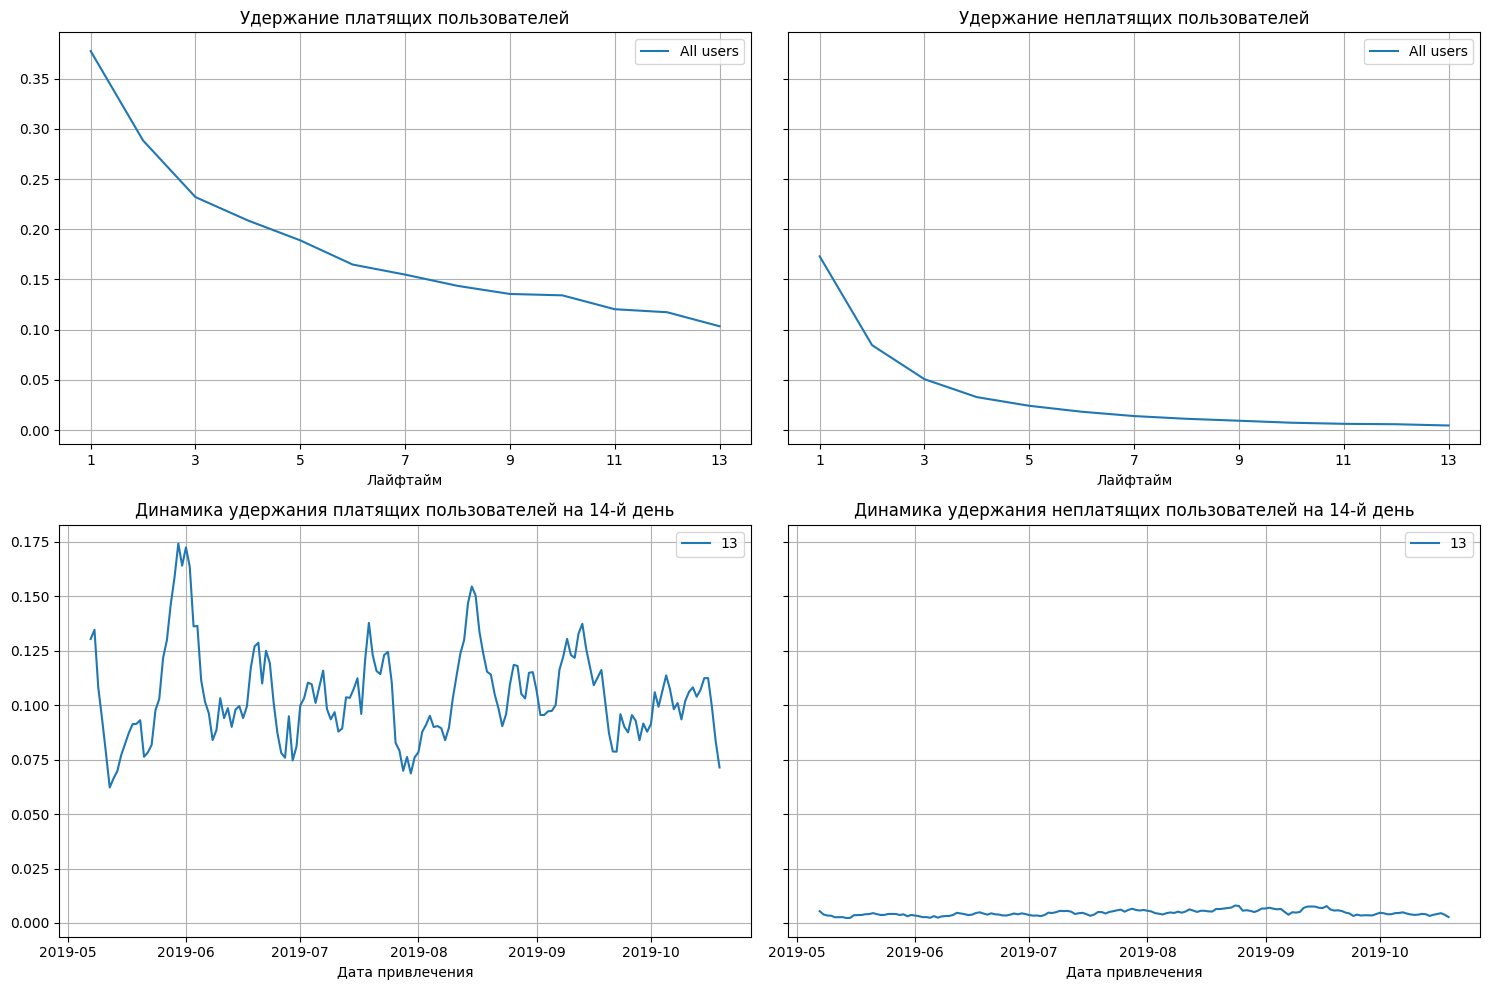

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

Нетрудно заметить, что пользователи стабильно плохо удерживаются. Для платящих клиентов видна постепенная просадка в уровне удержания, разница на 10-й день составляет приблизительно 60% по сравнению с первым днем. Для неплатящих пользователей наблюдается резкое уменьшение в удержании уже на третий день (разница в 75%).

Такая значительная разница в уровне удержания может быть связана с тем, что изначально в приложении присутствует бесплатный пробный период, который в течение нескольких дней заканчивается, или же ограничивается функционал приложения.

##### 6.2.2 Анализ по странам

Дополнительно проведем анализ по срезам. Начнем с анализа среза по странам.

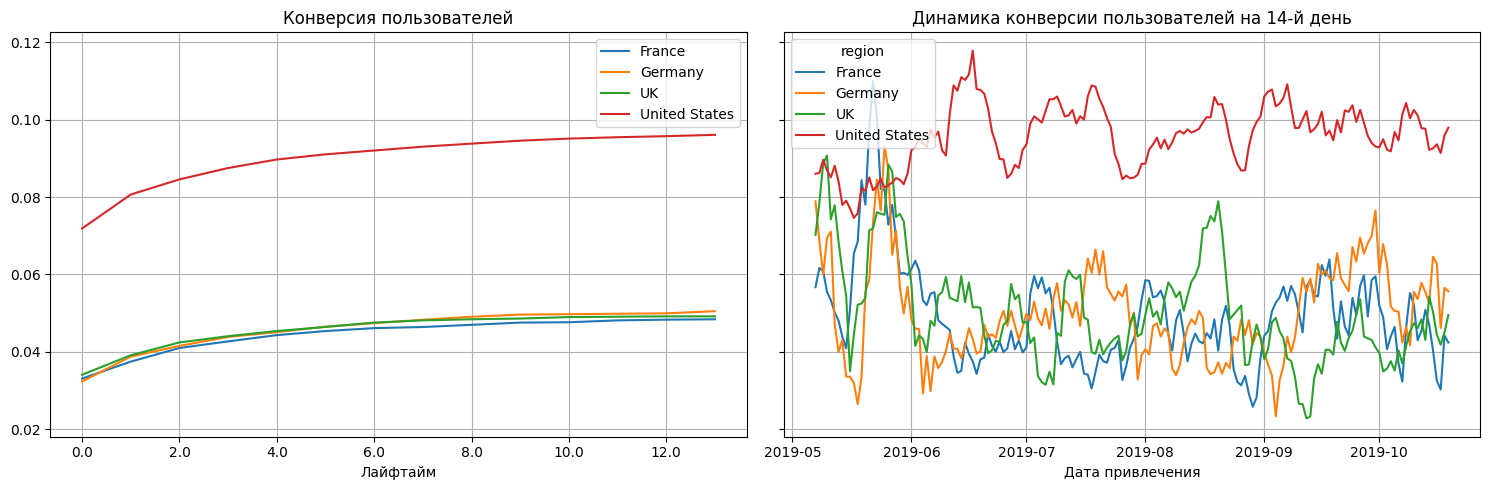

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

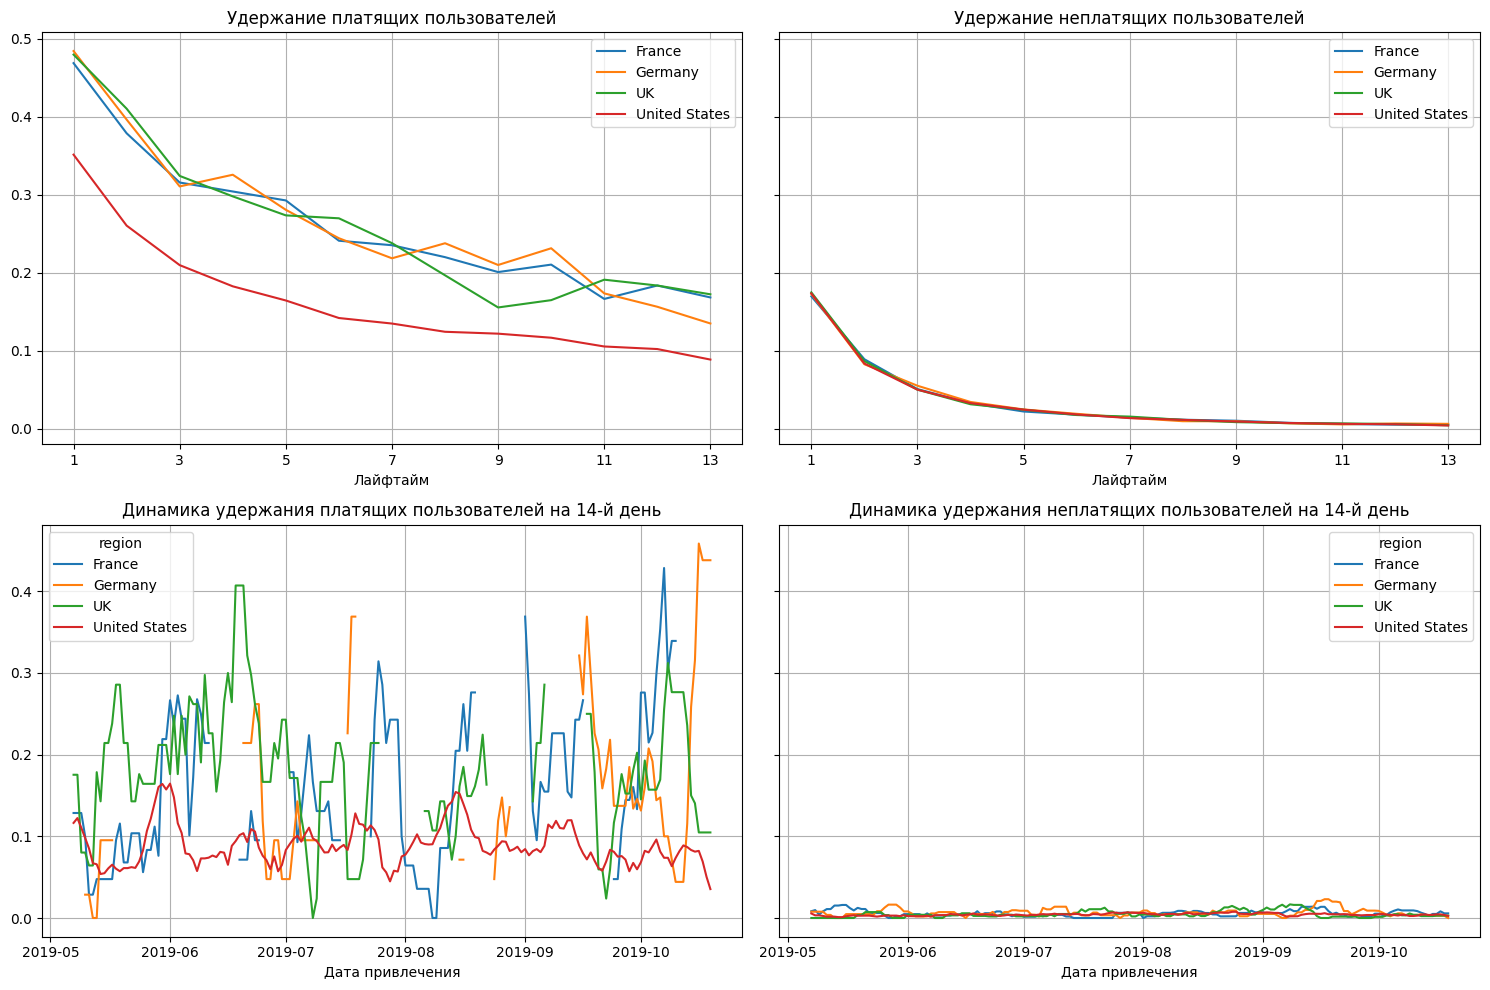

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать следующие выводы:

- Конверсия пользователей из региона **United States** сильно отличается от других стран (больше в 2 раза).
- При анализе удержания платящих пользователей наихудшие показатели наблюдаются у региона **United States**, остальные регионы имеют схожие показатели по удержанию и динамике.

##### 6.2.3 Анализ по девайсам

Проведем анализ среза по девайсам. Построим графики конверсии и удержания пользователей, динамику их изменения.

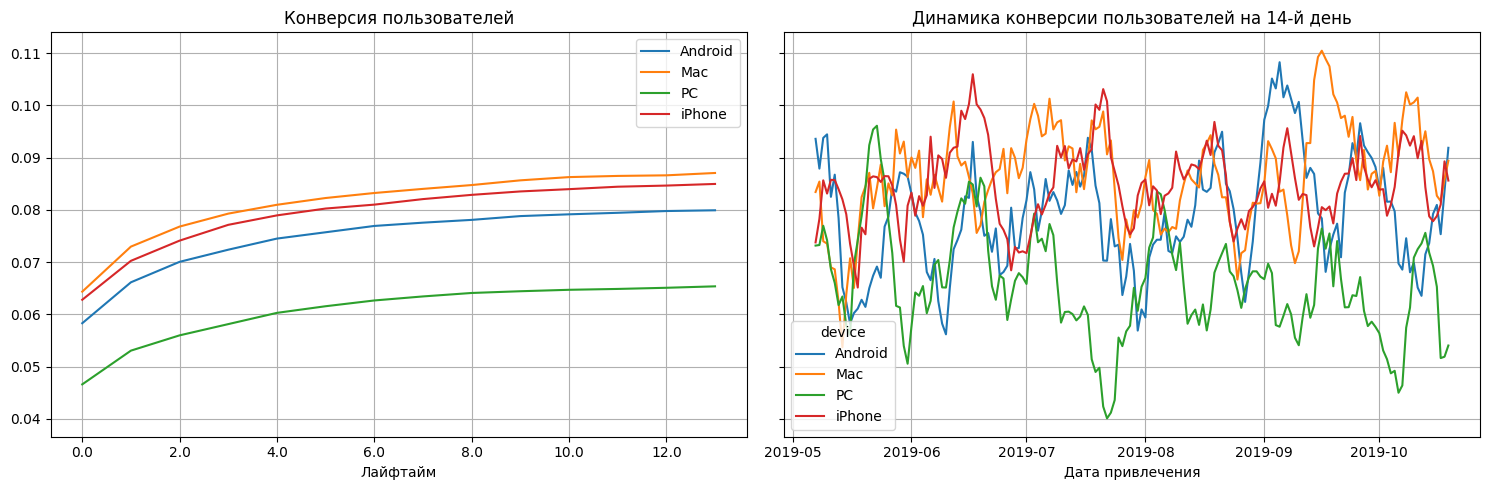

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

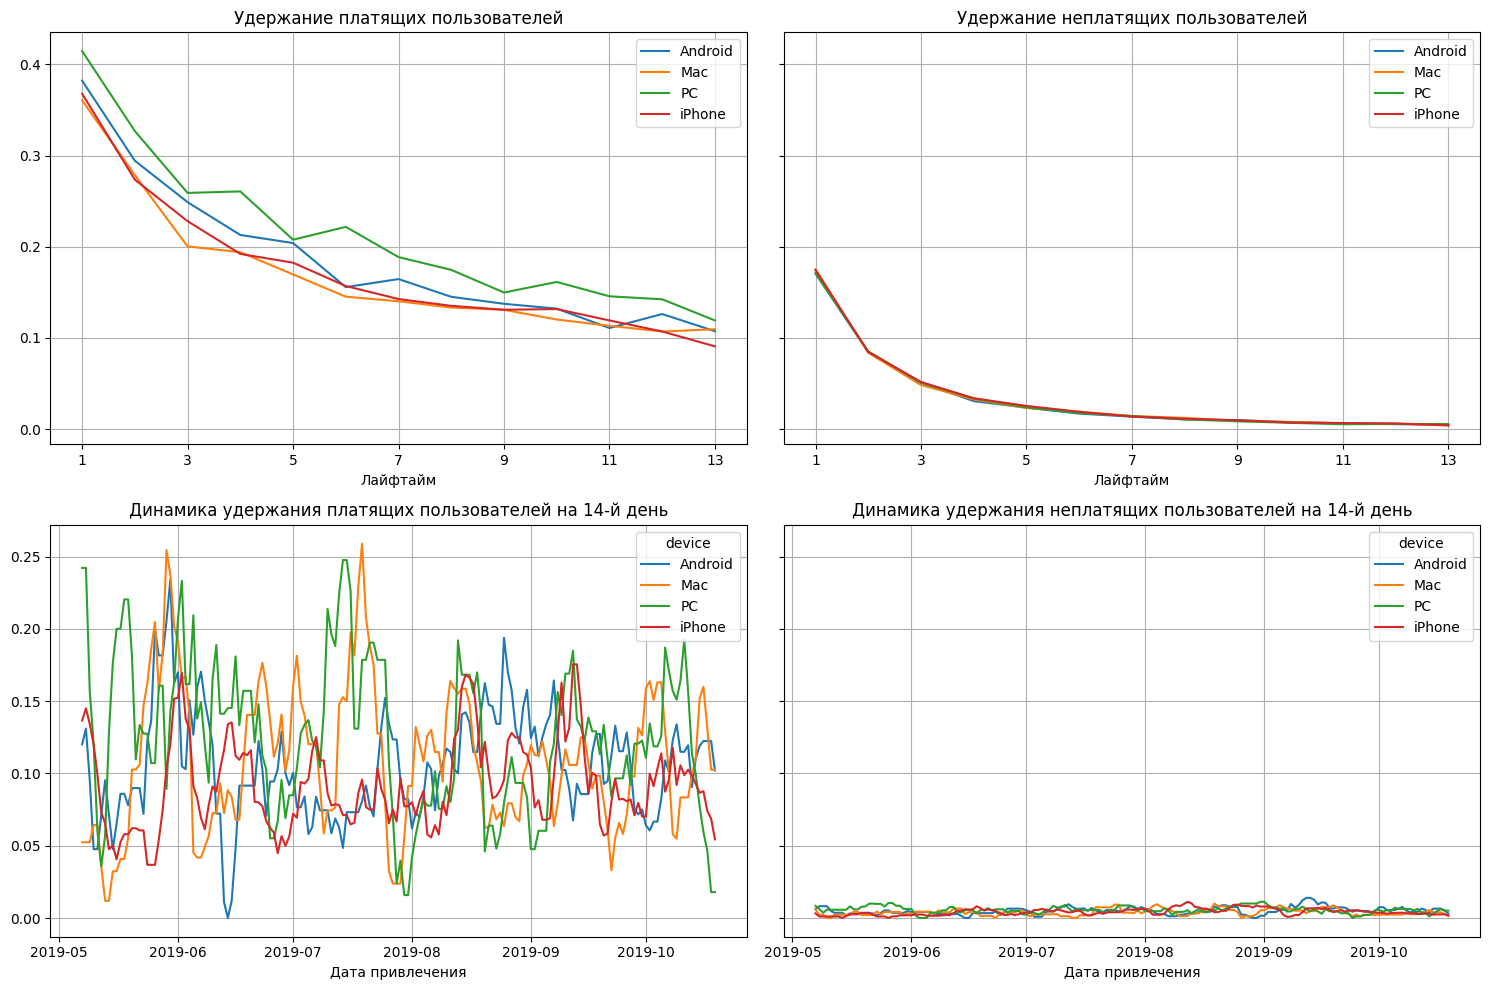

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наименьшие показатели конверсии пользователей показывает девайс **PC**. Остальные платформы показывает в среднем схожие показатели по конверсии.
- При анализе удержания пользователей показатели по всем девайсам довольно схожие, но у платформы **PC** наблюдаются немного лучшие показатели по удержанию платящих пользователей.

##### 6.2.4 Анализ по рекламным источникам

Проведем расчет показателей для рекламных источников.

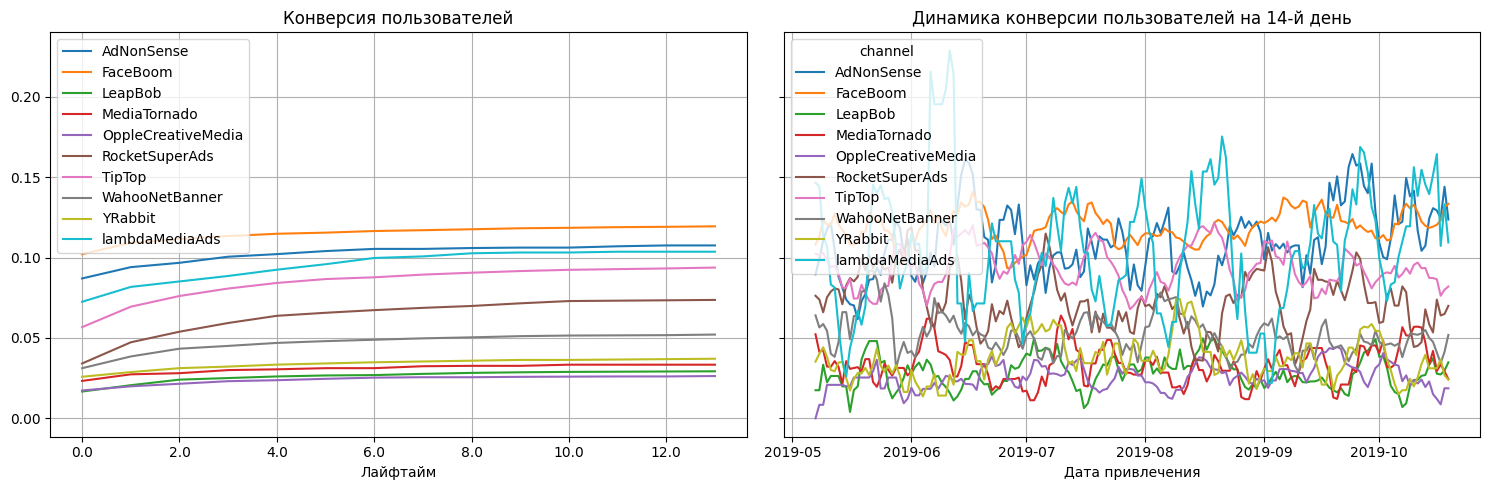

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

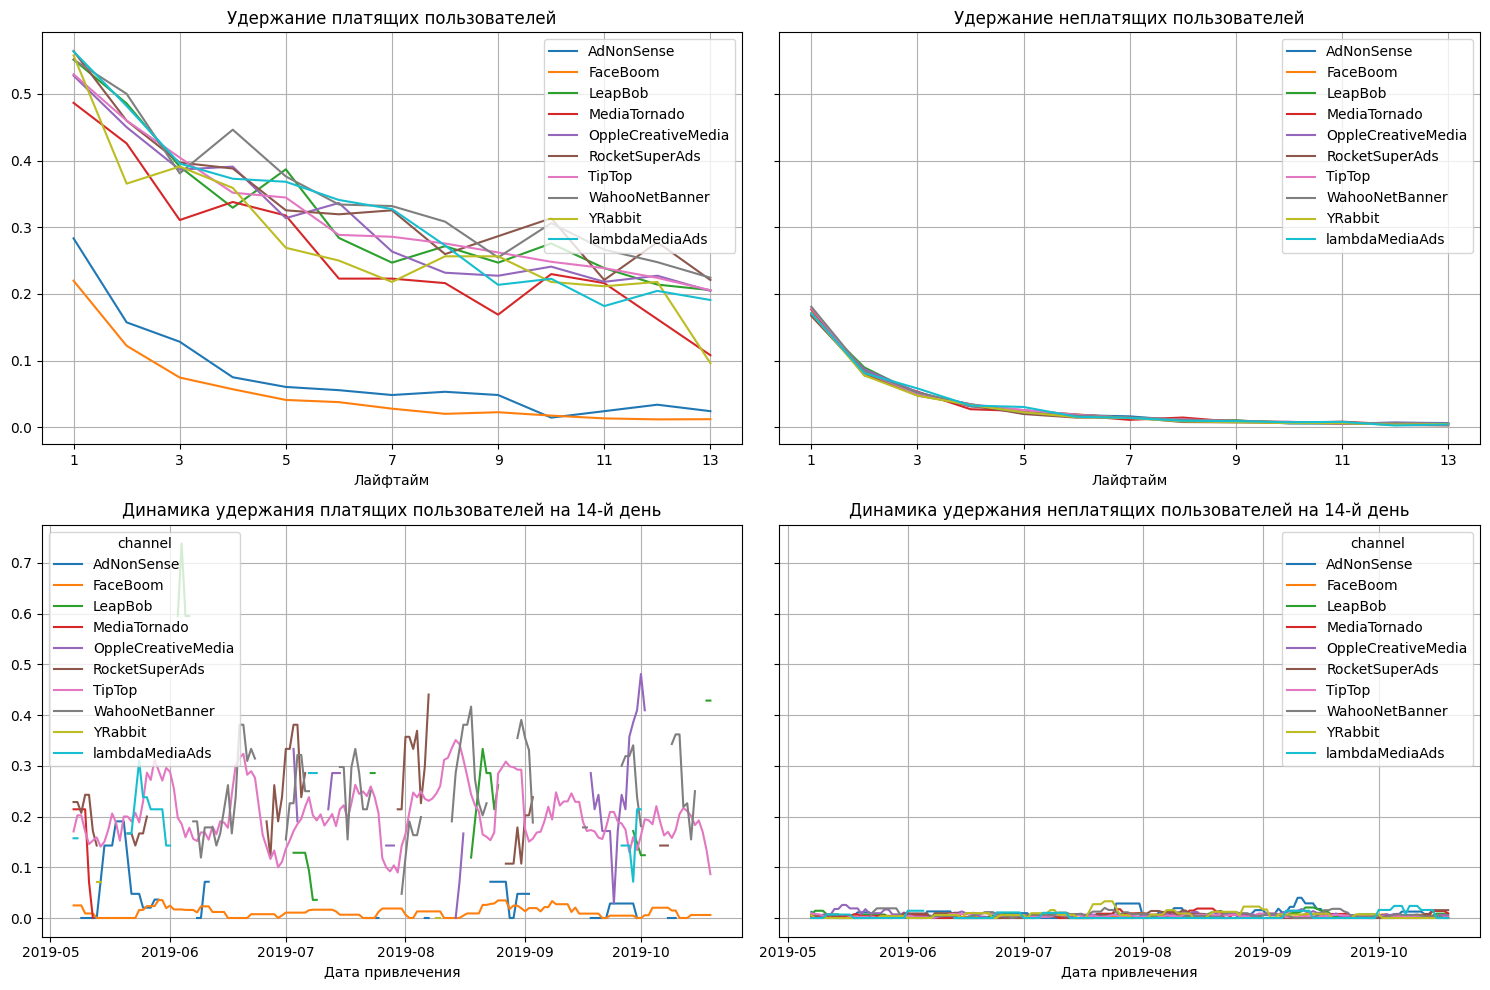

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наилучшие показатели по конверсии наблюдаются у рекламных источников **FaceBoom**, **AdNonSense** и **lambdaMediaAds**. Наихудшие - **OppleCreativeMedia**, **LeapBob**, **MediaTornado** и **YRabbit**. Разница в конверсии в среднем в 3,5 раза.
- При анализе удержания пользователей наихудшие показатели наблюдаются у рекламных источников **FaceBoom** и **AdNonSense**, остальные каналы имеют схожие показатели по удержанию и динамике.

#### 6.3 Анализ окупаемости рекламы по графикам LTV, CAC и ROI с разбивкой по устройствам

##### 6.3.1 Основной анализ окупаемости рекламы с разбивкой по устройствам

Проанализируем показатели `LTV`, `CAC` и `ROI` с учетом разбивки по устройствам. Для этого в функции `get_ltv()` в параметр *dimensions* добавим столбец `device`.

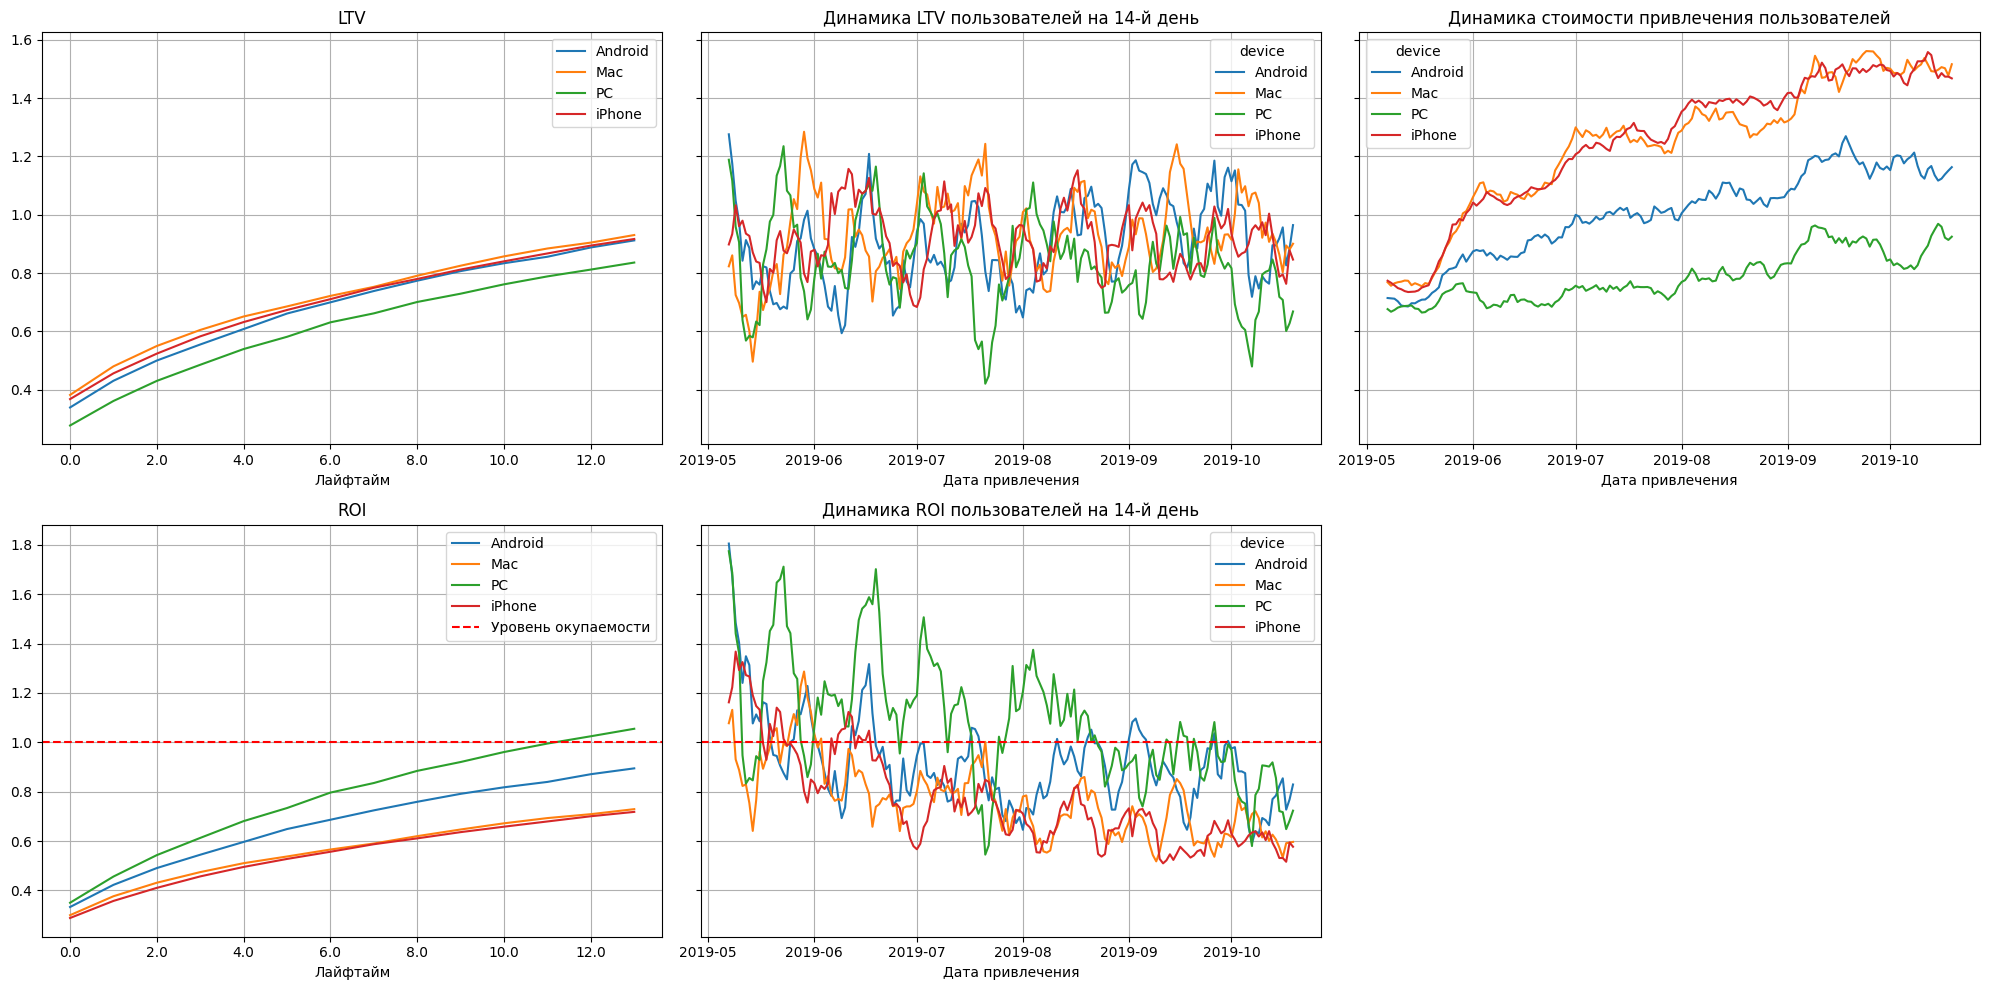

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наибольшие показатели по `LTV` имеют устройства **iPhone** и **Mac**. Однако, если оценивать стоимость привлечения клиентов для данных девайсов, то значения для них отличаются в среднем на 20% по сравнению с **Android** и на 40% по сравнению с **PC**.
- Реклама окупается только для платформы **PC**.
- Для каждого девайса наблюдается отрицательная динамика для `ROI`, однако наихудшие показатели имеют **iPhone** и **Mac**.

Очевидно, что затраты на рекламные кампании для девайсов **iPhone** и **Mac** оказываются слишком затратными и не оправдывают себя.

##### 6.3.2 Дополнительный анализ окупаемости рекламы для iPhone с разбивкой по странам

Дополнительно проанализируем показатели `LTV`, `CAC` и `ROI` для устройства **iPhone** с учетом разбивки по странам.

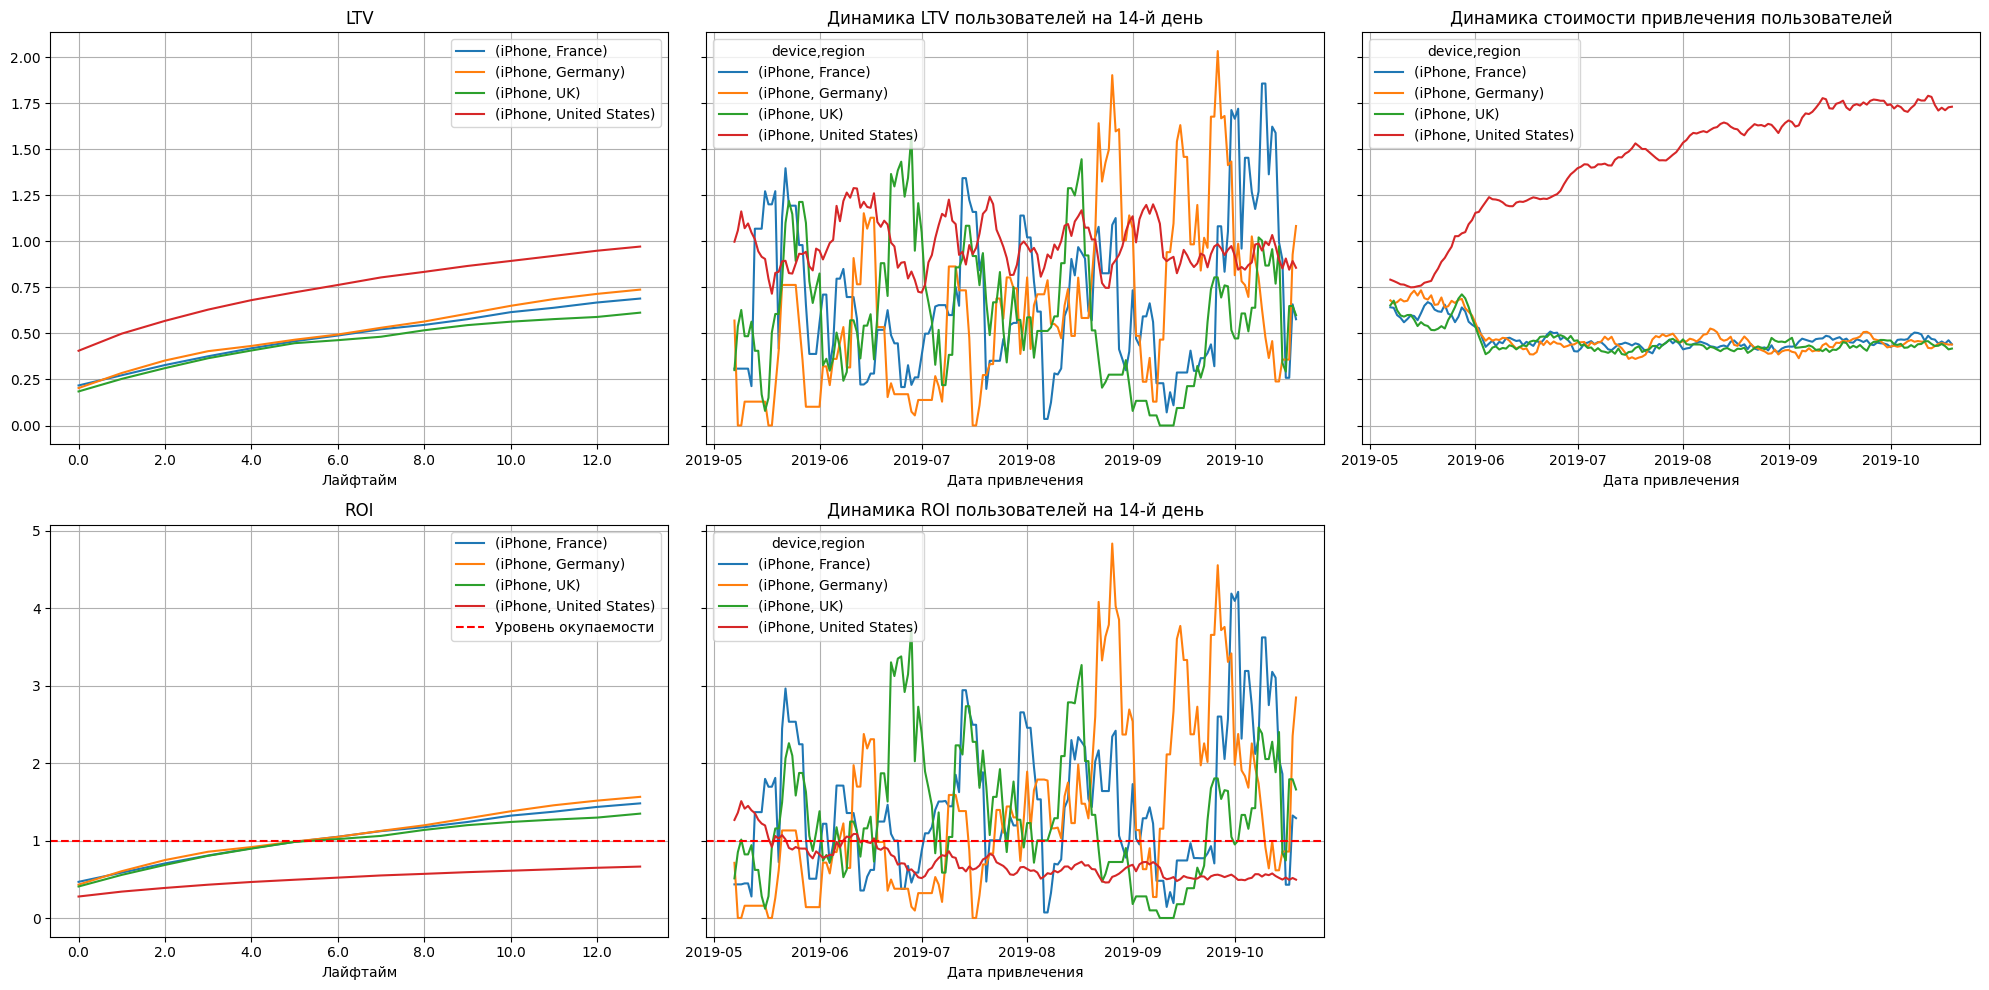

In [47]:
profiles_iphone = profiles.query('device == "iPhone"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_iphone, orders, observation_date, horizon_days, dimensions=['device', 'region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наибольшие показатели по `LTV` для устройства **iPhone** наблюдается в регионе **United States**.
- Наибольшие показатели по динамике стоимости привлечения пользователей для устройства **iPhone** наблюдаются в регионе **United States**. Разница по сравнению с другими странами в 3 раза.
- При анализе `ROI` для устройства **iPhone** окупаются все регионы на 5-й день кроме **United States**.

##### 6.3.3 Дополнительный анализ окупаемости рекламы для iPhone с разбивкой по рекламным источникам

Дополнительно проанализируем показатели `LTV`, `CAC` и `ROI` для устройства **iPhone** с учетом разбивки по рекламным источникам.

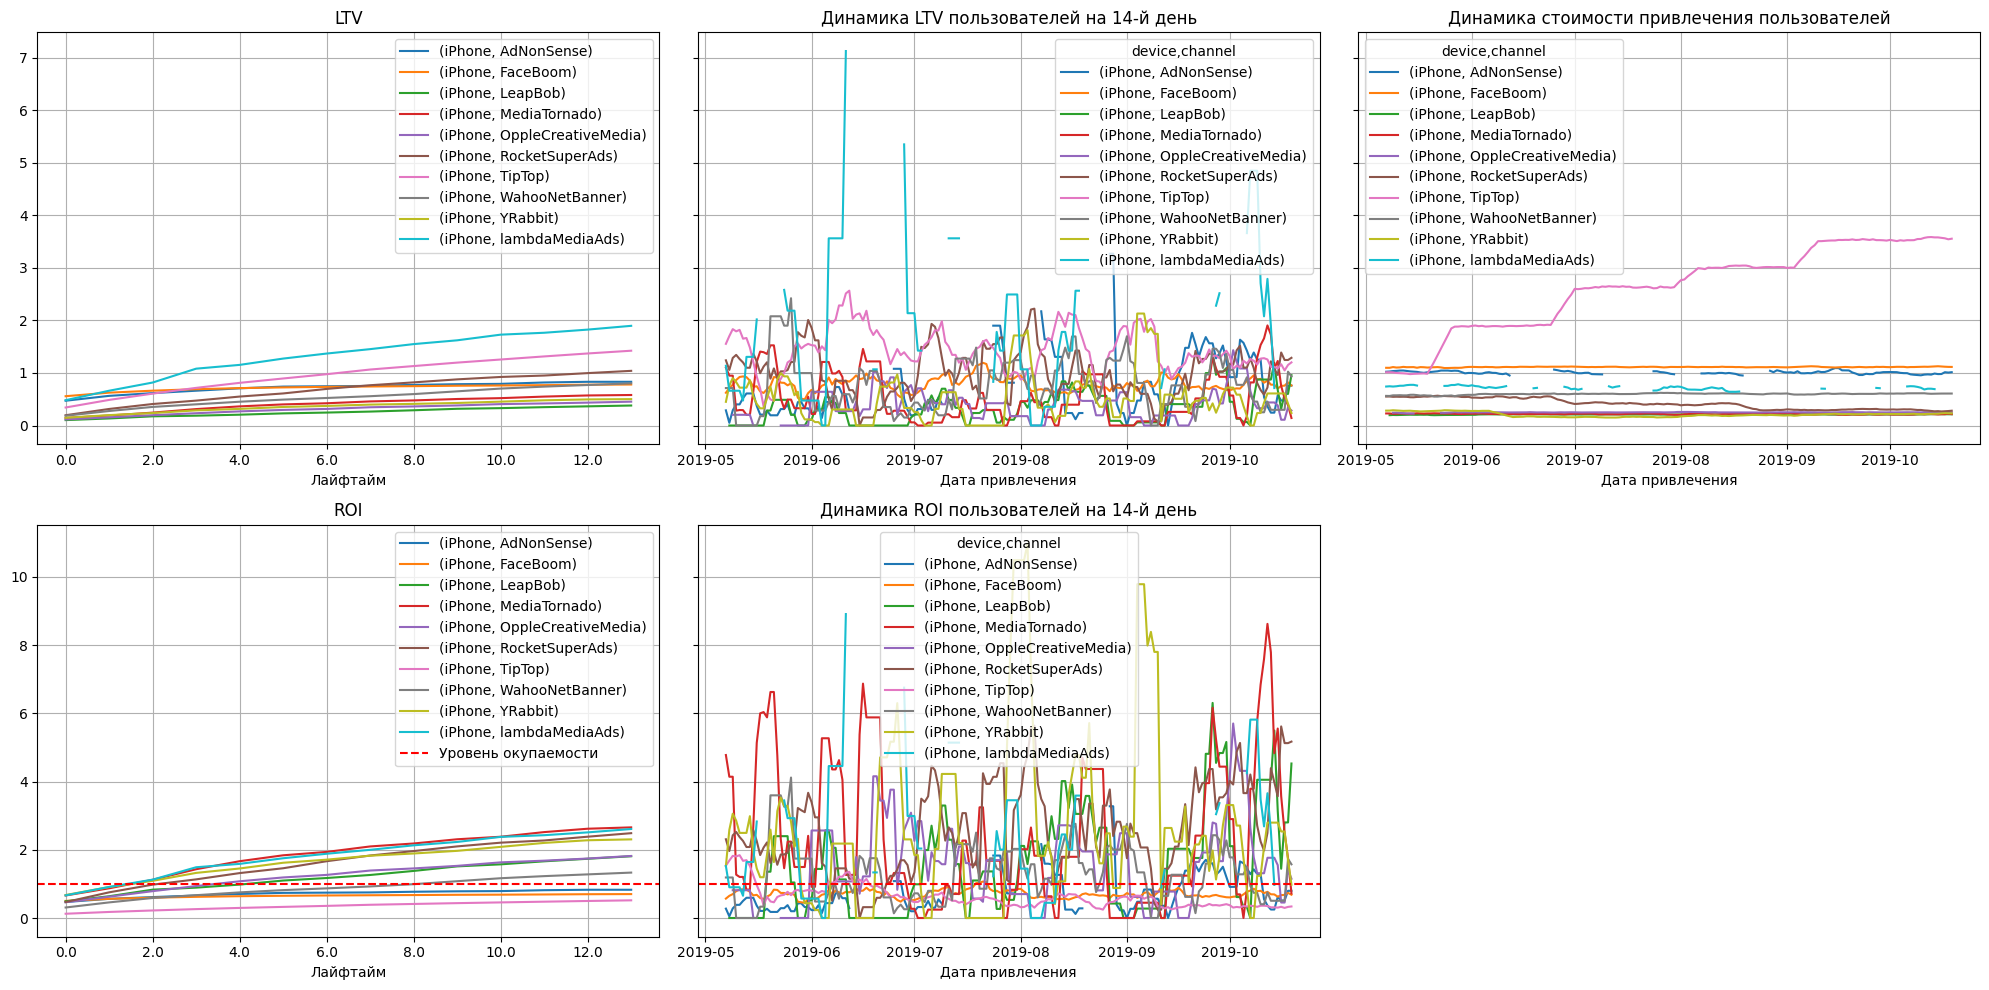

In [48]:
profiles_iphone = profiles.query('device == "iPhone"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_iphone, orders, observation_date, horizon_days, dimensions=['device', 'channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наибольшие показатели по `LTV` для устройства **iPhone** наблюдаются у **lambdaMediaAds** и **TipTop**.
- Реклама окупается для всех источников кроме **TipTop**, **FaceBoom** и **AdNonSense**. У этих же рекламных каналов наблюдаются наибольшие показатели по динамике стоимости привлечения пользователей.

#### 6.4 Анализ окупаемости рекламы по графикам LTV, CAC и ROI с разбивкой по странам

Проанализируем показатели `LTV`, `CAC` и `ROI` с учетом разбивки по странам. Для этого в функции `get_ltv()` в параметр *dimensions* добавим столбец `region`.

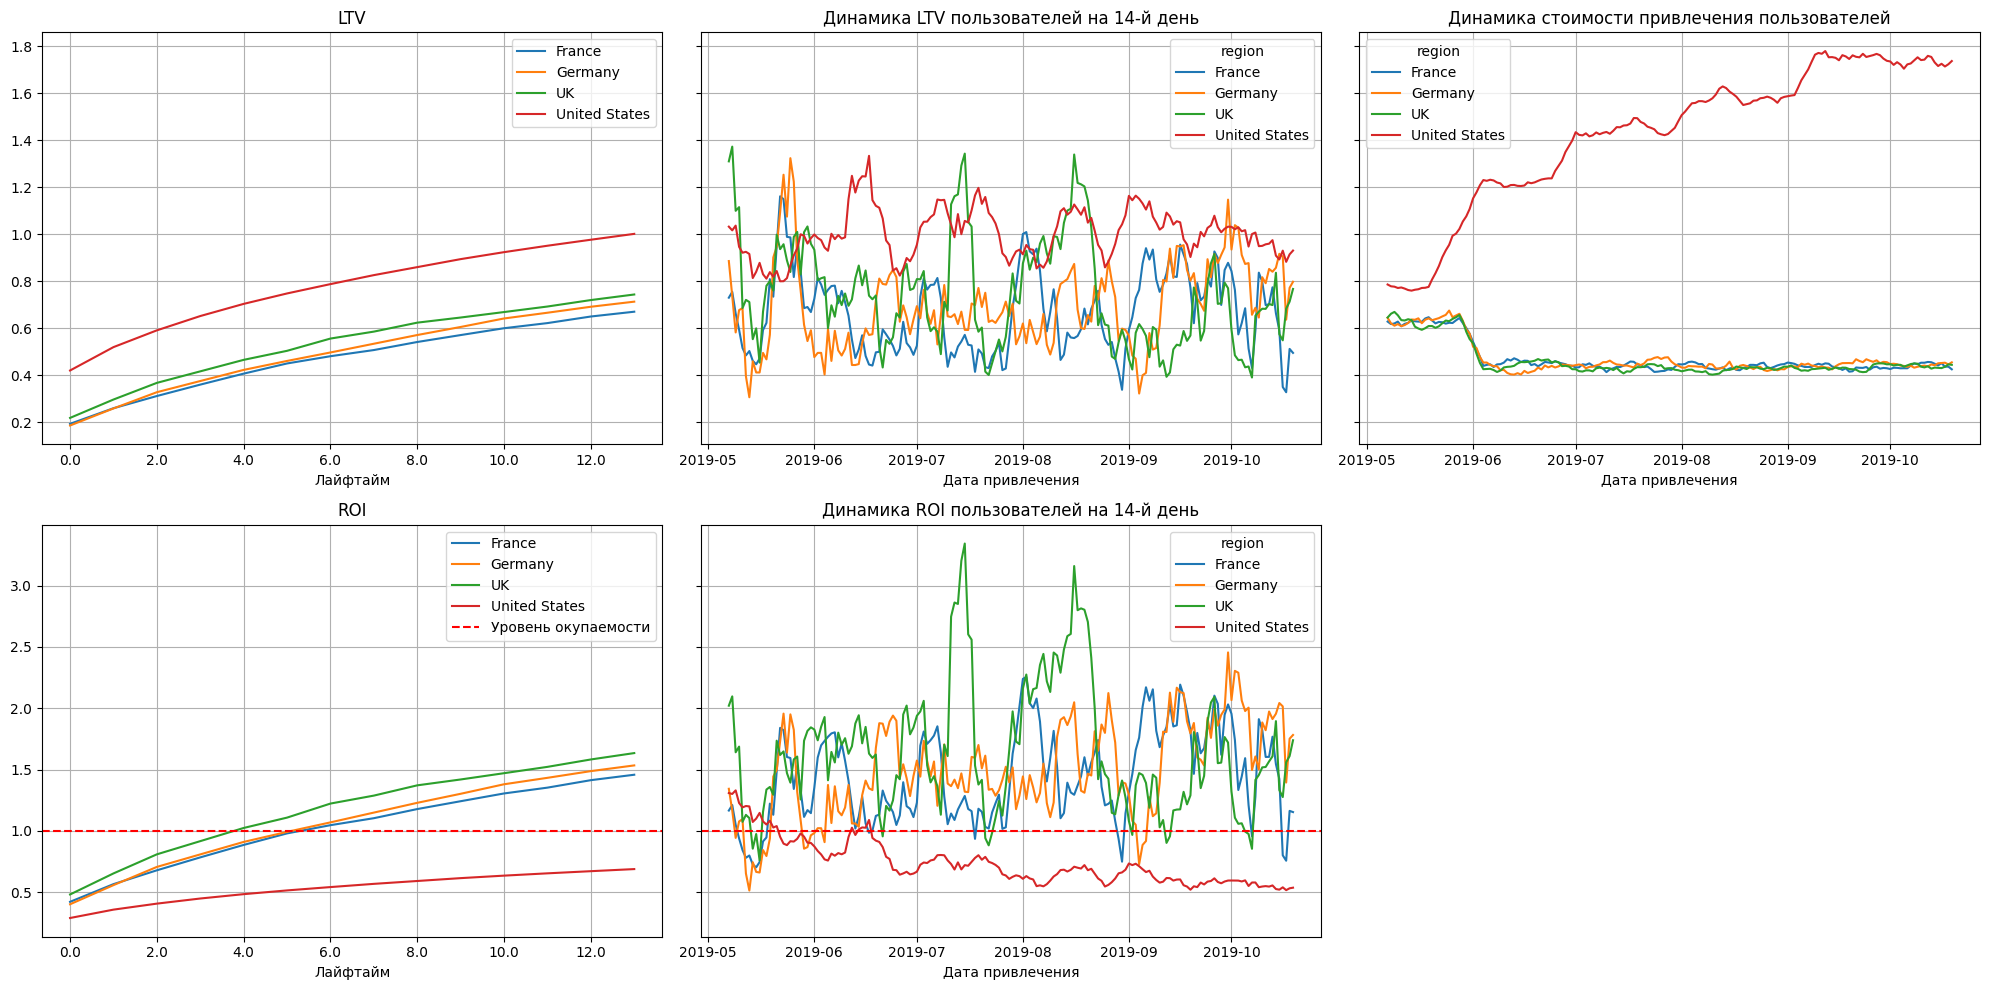

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Наибольший показатель по `LTV` имеет регион **United States**. По оценке стоимости привлечения клиентов для данного региона его значение отличается от других регионов в среднем на 70%.
- Реклама не окупается только для региона **United States**, для остальных же стран окупаемость происходит уже на 4-й день.
- Наихудшие показатели для `ROI` с отрицательной динамикой демонстрирует регион **United States**, остальные же страны в среднем держатся на одном уровне.

Очевидно, что самым убыточным регионом является **United States**. Хоть у него и наблюдается наибольший показатель `LTV`, однако он не перекрывает большие затраты на привлечение пользователей.

#### 6.5 Анализ окупаемости рекламы по графикам LTV, CAC и ROI с разбивкой по рекламным каналам

Проанализируем показатели `LTV`, `CAC` и `ROI` с учетом разбивки по рекламным каналам. Для этого в функции `get_ltv()` в параметр *dimensions* добавим столбец `channel`.

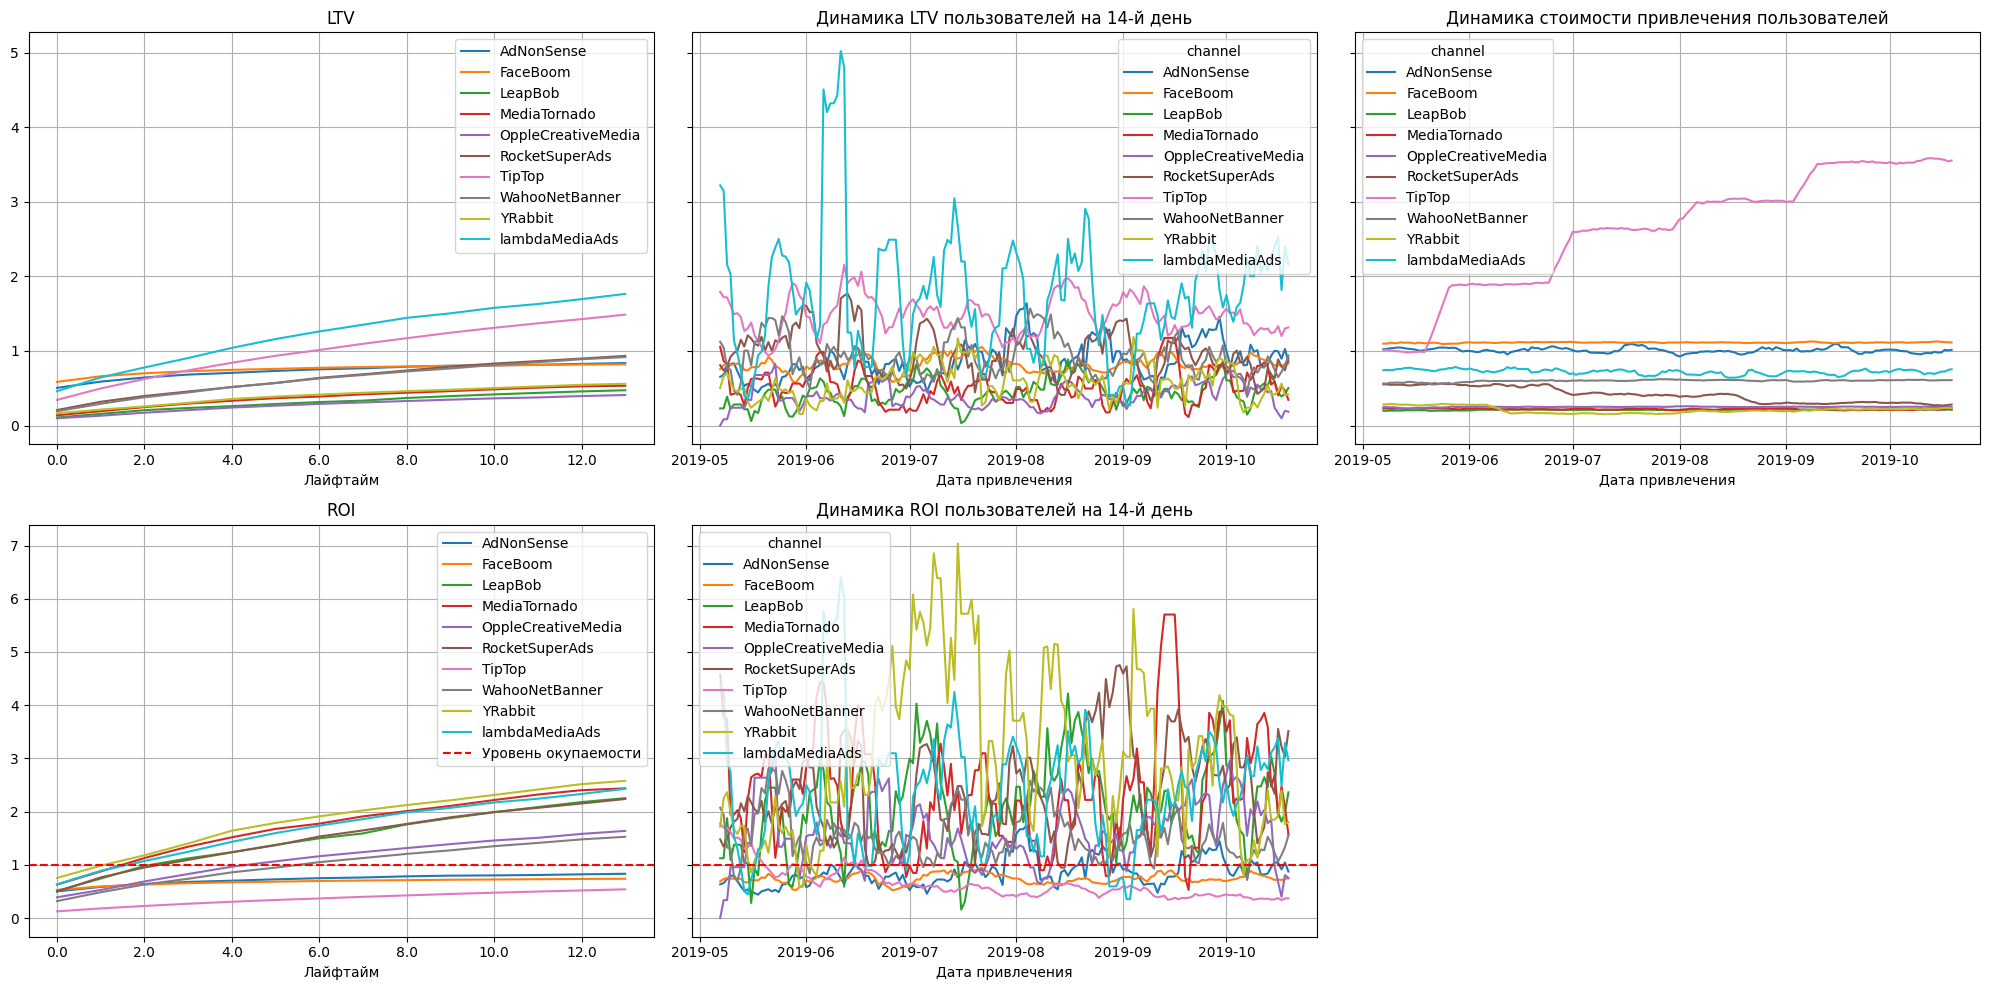

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- По показателю `LTV` наибольшие значения принимают источники **lambdaMediaAds** и **TipTop**. График, показывающий динамику `LTV` рекламного источника **lambdaMediaAds**, имеет много выбросов, самый большой из которых наблюдается в начале июня. Остальные же рекламные каналы имеют более усредненную форму с более низким уровнем.
- При оценке стоимости привлечения клиентов нетрудно заметить, что наибольший показатель имеет источник **TipTop**, остальные же каналы имеют затраты в среднем ниже на 70%.
- Реклама не окупается только для источников **TipTop**, **FaceBoom** и **AdNonSense**.
- Оценка динамики показателя `ROI` демонстрирует, что в течение всего рассматриваемого периода не окупаются только три рекламных канала: **TipTop**, **FaceBoom** и **AdNonSense**.
- Наилучшие показатели имеют рекламные источники **lambdaMediaAds**, **YRabbit** и **RocketSuperAds** по совокупности показателей: стоимость привлечения пользователей, `LTV`, `ROI` и их динамика.

Таким образом, видно, что наименее рентабельными рекламными каналами являются **TipTop**, **FaceBoom** и **AdNonSense**. Три данных источника имеют наибольшую стоимость привлечения пользователей, при этом ни один из них не окупается. Источники **lambdaMediaAds**, **YRabbit** и **RocketSuperAds** наоборот показывают наилучшие результаты по совокупности показателей, наилучшим из них является **lambdaMediaAds**.

**Вывод:**

Проанализировав информацию о посещениях, покупках и расходах на рекламу рассматриваемого приложения, можно выделить следующие факторы, оказывающие наибольшее влияние на убыточность:

- При больших затратах на привлечение пользователей с устройствами **iPhone** и **Mac** по сравнению с другими девайсами реклама не окупается. В среднем этот показатель оказывается выше на 20-40%.
- При оценке влияния региона на окупаемость рекламных кампаний видно, что наибольшие затраты идут на регион **United States**. При этом данная страна является единственной в списке, реклама которой не окупается. Для других же регионов окупаемость происходит уже на 4-й день.
- По анализу рекламных источников наибольшему значению стоимости привлечения клиентов соответствуют три рекламных канала: **TipTop**, **FaceBoom** и **AdNonSense**. При этом ни один из них не окупается, в то время как остальные окупаются в среднем на 4-й день.
- Наилучшие показатели имеют рекламные источники **lambdaMediaAds**, **YRabbit** и **RocketSuperAds** по совокупности показателей: стоимость привлечения пользователей, `LTV`, `ROI` и их динамика.

### 7. Общий вывод

---

В данной работе были проанализированы данные о посещениях, заказах и затратах на рекламу для развлекательного приложения. На этапе предобработки данных были преобразованы названия столбцов, проверено наличие пропусков в данных, изменены типы данных там, где это было необходимо, проверено наличие явных и неявных дубликатов. Были написаны функции для расчета основных метрик и дальнейшей их визуализации. В исследовании рассматривались актуальные данные с начала мая по конец октября 2019 года.

В результате выполнения работы был проведен исследовательский анализ и было изучено, что наилучшие показатели по привлечению клиентов и доле платящих пользователей показывают:
- Регион – **United States** по совокупности показателей, **Germany** по доле платящих пользователей.
- Устройство – **iPhone** по совокупности показателей, **Mac** по доле платящих пользователей.
- Рекламный источник – **FaceBoom** и **TipTop** по совокупности показателей.

Также была проанализирована маркетинговая часть, т.е. количество вложенных средств в рекламу приложения. На основании проведенного анализа были сделаны следующие выводы:
- Наибольшее количество средств было потрачено на рекламные источники **TipTop** и **FaceBoom**, траты на другие рекламные источники отличаются на порядок.
- Наибольшие значения средней стоимости привлечения одного пользователя имеют источники **TipTop**, **FaceBoom** и **AdNonSense**.

Однако, при этом за рассматриваемый период приложение несло убытки и необходимо было выявить причины, оказывающие наибольшее на это влияние. Была произведена оценка окупаемости рекламных каналов и было выявлено следующее:
- При больших затратах на привлечение пользователей с устройствами **iPhone** и **Mac** по сравнению с другими девайсами реклама не окупается. В среднем этот показатель оказывается выше на 20-40%.
- При оценке влияния региона на окупаемость рекламных кампаний видно, что наибольшие затраты идут на регион **United States**. При этом данная страна является единственной в списке, реклама которой не окупается. Для других же регионов окупаемость происходит уже на 4-й день.
- По анализу рекламных источников наибольшему значению стоимости привлечения клиентов соответствуют три рекламных канала: **TipTop**, **FaceBoom** и **AdNonSense**. При этом ни один из них не окупается, в то время как остальные окупаются в среднем на 4-й день.
- Наилучшие показатели имеют рекламные источники **lambdaMediaAds**, **YRabbit** и **RocketSuperAds** по совокупности показателей: стоимость привлечения пользователей, `LTV`, `ROI` и их динамика.

Таким образом, для того, чтобы приложение начало приносить прибыль, рекомендуется сделать следующее:
- Уменьшить затраты на привлечение пользователей с устройствами **iPhone** и **Mac** для рекламных каналов **TipTop** и **FaceBoom** и переориентировать эти средства на рекламу в источниках **lambdaMediaAds**, **YRabbit** и **RocketSuperAds**.
- Уменьшить затраты на рекламную кампанию для региона **United States** и перенаправить эти средства на другие страны.
- Увеличить финансирование для рекламных источников **lambdaMediaAds**, **YRabbit** и **RocketSuperAds** для всех устройств и уменьшить затраты на **TipTop**, **FaceBoom** и **AdNonSense**.

При выполнении этих трех пунктов, а именно: переориентации рынка, используемых устройств и рекламных каналов, весьма вероятно, что данные шаги поспособствуют более быстрому выходу компании в плюс.